<a href="https://colab.research.google.com/github/dougscohen/Build-Week-1/blob/master/Shot_Logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
# Import Shot Logs data

df = pd.read_csv('shot_logs.csv')

# Analyze shape, and print the first 5 observations

print(df.shape)
df.head()

(128069, 21)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [0]:
# Create subset of the dataframe where we only include shots that were made

made_subset = df[df['SHOT_RESULT'] == 'made']

print(made_subset.shape)
made_subset.head()

(57905, 21)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,2.5,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
11,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,3,4,11:32,12.1,14,11.9,14.6,2,made,"Lin, Jeremy",202391,1.8,1,2,brian roberts,203148
12,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,4,4,8:55,4.3,2,2.9,5.9,2,made,"Hill, Jordan",201941,5.4,1,2,brian roberts,203148
15,21400859,"FEB 27, 2015 - CHA @ BOS",A,L,-8,2,2,10:38,6.4,3,2.7,24.7,3,made,"Young, James",203923,5.6,1,3,brian roberts,203148


In [0]:
# Create subset where the only types of shots are 3 pointers (threes_att is 
# short for three pointers attempted)

threes_att = df[df['PTS_TYPE'] == 3]

print(threes_att.shape)
threes_att.head()

(33896, 21)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,0.8,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,1.1,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148
10,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,2,2,6:30,16.0,8,7.5,24.5,3,missed,"Lin, Jeremy",202391,4.7,0,0,brian roberts,203148
13,21400882,"MAR 01, 2015 - CHA @ ORL",A,W,15,1,4,9:10,4.4,0,0.8,26.4,3,missed,"Green, Willie",2584,4.4,0,0,brian roberts,203148


In [0]:
# Already have a subset where the only shots taken were 3 pointers (threes_att)

# Create subset where the only types of shots are 2 pointers

twos_att = df[df['PTS_TYPE'] == 2]

print(twos_att.shape)

(94173, 21)


### Running a 2 Sample T-Test (2-pointers vs. 3 pointers)

1) Null Hypothesis: Shooting percentage for players shooting 2-pointers is equal to shooting percentage for players shooting 3-pointers

$ H_0: \bar{x}_{2} == \bar{x}_{3}$


2) Alternative Hypothesis: Shooting percentage for players shooting 2-pointers is NOT equal to shooting percentage for players shooting 3-pointers

$ H_0: \bar{x}_{2} \neq \bar{x}_{3}$

3) Confidence Level: 95%

In [0]:
from scipy import stats

# 2 sample T-test between 2-pointers and 3-pointers Samples

stats.ttest_ind(twos_att['FGM'], threes_att['FGM'])

Ttest_indResult(statistic=43.72932056376576, pvalue=0.0)

### Result

Conclusion: 

Based on a t-stat of 43.729 and p-value of 0, I **reject** the null hypothesis that players shooting percentage is the same for 2-pointers vs. 3-pointers, and suggest the alternative that the players shooting percentage for 2-pointers an 3-pointers is different. I also conclude that shooting percentage is higher for 2-pointers because of the postive t-stat.

In [0]:
# Percentage of shots made on 3-point attempts and 2-point attemps

print(threes_att['FGM'].mean())
print(twos_att['FGM'].mean())

0.3515164031154118
0.48835653531266926


In [0]:
# Create subsets of data where one only contains shots taken by the home team, 
# and the other only contains shots taken by the away team

df_home = df[df['LOCATION'] == 'H']
df_away = df[df['LOCATION'] == 'A']

print(df_home.shape)
print(df_away.shape)

(63934, 21)
(64135, 21)


### Running a 2 Sample T-Test

1) Null Hypothesis: Shooting percentage for players who are playing at Home is equal to shooting percentage for players who are playing Away

$ H_0: \bar{x}_{h} == \bar{x}_{a}$


2) Alternative Hypothesis: Shooting percentage for players who are playing Away is NOT equal to shooting percentage for players who are playing at Home

$ H_0: \bar{x}_{h} \neq \bar{x}_{a}$

3) Confidence Level: 95%

In [0]:
# 2 sample T-test between Home vs. Away Samples

stats.ttest_ind(df_home['FGM'], df_away['FGM'])

Ttest_indResult(statistic=2.896455283597539, pvalue=0.003774682826765074)

### Result

Conclusion: 

Based on a t-stat of 2.896 and p-value of 0.0038, I **reject** the null hypothesis that players shooting percentage is the same at home vs. away, and suggest the alternative that the players shooting percentage at home games and away games is different. I also conclude that shooting percentage is higher for players at home because of the postive t-stat.

In [0]:
# Percentage of shots made at home vs. away

print(df_home['FGM'].mean())
print(df_away['FGM'].mean())

0.45617355397753934
0.4481172526701489


In [0]:
# Create subsets of data where one only contains shots taken during 
# regulation (Periods 1-4), and the other only contains shots taken 
# during OT (Periods 5+)

df_regulation = df[df['PERIOD'] <= 4]
df_OT = df[df['PERIOD'] > 4]

print(df_regulation.shape)
print(df_OT.shape)

(126946, 21)
(1123, 21)


### Running a 2 Sample T-Test (Regulation vs. OT)

1) Null Hypothesis: Shooting percentage for players in Regulation is equal to shooting percentage for players in Overtime (OT)

$ H_0: \bar{x}_{r} == \bar{x}_{ot}$


2) Alternative Hypothesis: Shooting percentage for players in Regulation is NOT equal to shooting percentage for players in Overtime (OT)

$ H_0: \bar{x}_{r} \neq \bar{x}_{ot}$

3) Confidence Level: 95%

In [0]:
# 2 sample T-test between Regulation vs. Overtime Samples

stats.ttest_ind(df_regulation['FGM'], df_OT['FGM'])

Ttest_indResult(statistic=3.779210961122991, pvalue=0.00015739733343747304)

### Result

Conclusion: 

Based on a t-stat of 3.779 and p-value of 0.00016, I **reject** the null hypothesis that players shooting percentage is the same in regulation vs. overtime, and suggest the alternative that the players shooting percentage during regulation and overtime is different. I also conclude that shooting percentage is higher for players during regulation because of the postive t-stat.

In [0]:
# Percentage of shots made during regulation vs. OT

print(df_regulation['FGM'].mean())
print(df_OT['FGM'].mean())

0.45263340317930456
0.396260017809439


In [0]:
# percentage of made vs. missed shots in general during that season

df['SHOT_RESULT'].value_counts(normalize=True)*100

missed    54.786092
made      45.213908
Name: SHOT_RESULT, dtype: float64

In [0]:
# Create copy of the dataframe so that we can manipulate some of the 
# 'Shot Clock' data because it includes NaN values

df_test = df.copy()

print(df_test.shape)
df_test.head()

(128069, 21)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [0]:
# Analyze different values for Shot Clock column
# Only column with NaN values

df['SHOT_CLOCK'].value_counts(dropna=False)

NaN     5567
24.0    3857
11.0    1496
12.0    1495
14.0    1450
        ... 
0.4       88
0.0       78
0.3       71
0.1       67
0.2       64
Name: SHOT_CLOCK, Length: 242, dtype: int64

In [0]:
# Drop the NaN values in the datafram (only in shot clock column)
# There are NaN values here because if there is less than 24 seconds on the 
# game clock, the shot clock gets turned off and no value is recorded in 
# 'Shot Clock' for a shot taken in that time

df_test = df_test.dropna()

print(df_test.shape)

(122502, 21)


In [0]:
# Of all the shots taken this year, find the average time on the Shot Clock 
# at the time those shots were taken

df_test['SHOT_CLOCK'].mean()

12.453343618879783

In [0]:
# Create a subset where the only shots taken were ones where the Shot Clock 
# was greater than or equal to 12 seconds (first half of the possession)

df_first12 = df_test[df_test['SHOT_CLOCK'] >= 12.0]
df_last12 = df_test[df_test['SHOT_CLOCK'] < 12.0]

print(df_first12.shape)
print(df_last12.shape)

(64455, 21)
(58047, 21)


### Running a 2 Sample T-Test (First 12 seconds of possesion vs. last 12 seconds of possession)

1) Null Hypothesis: Shooting percentage for players during the first half of the possession is equal to shooting percentage for players during the second half of the possession

$ H_0: \bar{x}_{1st} == \bar{x}_{2nd}$


2) Alternative Hypothesis:  Shooting percentage for players during the first half of the possession is NOT equal to shooting percentage for players during the second half of the possession

$ H_0: \bar{x}_{1st} \neq \bar{x}_{2nd}$

3) Confidence Level: 95%

In [0]:
# 2 sample T-test between Shot clock >= 12 and Shot Clock < 12 Samples

stats.ttest_ind(df_first12['FGM'], df_last12['FGM'])

Ttest_indResult(statistic=22.10699161410653, pvalue=4.410850707455259e-108)

### Result

Conclusion: 

Based on a t-stat of 22.107 and p-value of ~ 0, I **reject** the null hypothesis that players shooting percentage is the same in the first half of the possesion vs. the second half of the possession, and suggest the alternative that the players shooting percentage during the first and second havles of the possession is different. I also conclude that shooting percentage is higher for players during the first 12 seconds of the shot clock because of the postive t-stat.

In [0]:
# Percentage of shots made during first half vs. second half of possession

print(df_first12['FGM'].mean())
print(df_last12['FGM'].mean())

0.48595143898844156
0.4230709597395214


In [0]:
# Create a subset where the only shots taken were ones where the Shot Clock 
# was greater than or equal to 20 seconds

df_first4 = df_test[df_test['SHOT_CLOCK'] >= 20.0]

# Print shape and FG %

print(df_first4.shape)
print(df_first4['FGM'].mean())

(14131, 21)
0.5770292265232467


In [0]:
# Create subset of dataframe where the only shots taken were the ones where the 
# shot clock was less than or equal to 1 second

last_second_shot_subset = df[df['SHOT_CLOCK'] <= 1.0]

# Print shape and FG %

print(last_second_shot_subset.shape)
print(last_second_shot_subset['FGM'].mean())

(1328, 21)
0.276355421686747


In [0]:
# Create subset of dataframe where the only shots taken were the ones where the 
# shot clock was less than or equal to 3 seconds

last_3_seconds_subset = df[df['SHOT_CLOCK'] <= 3.0]

# Print shape and FG %

print(last_3_seconds_subset.shape)
print(last_3_seconds_subset['FGM'].mean())

(6431, 21)
0.33929404447208833


In [0]:
# Create subset of dataframe where the only shots taken were the ones where the 
# shot clock was less than or equal to 10 seconds

last_10_seconds_subset = df[df['SHOT_CLOCK'] <= 10.0]

# Print shape and FG %

print(last_10_seconds_subset.shape)
print(last_10_seconds_subset['FGM'].mean())

(43937, 21)
0.41573161572251177


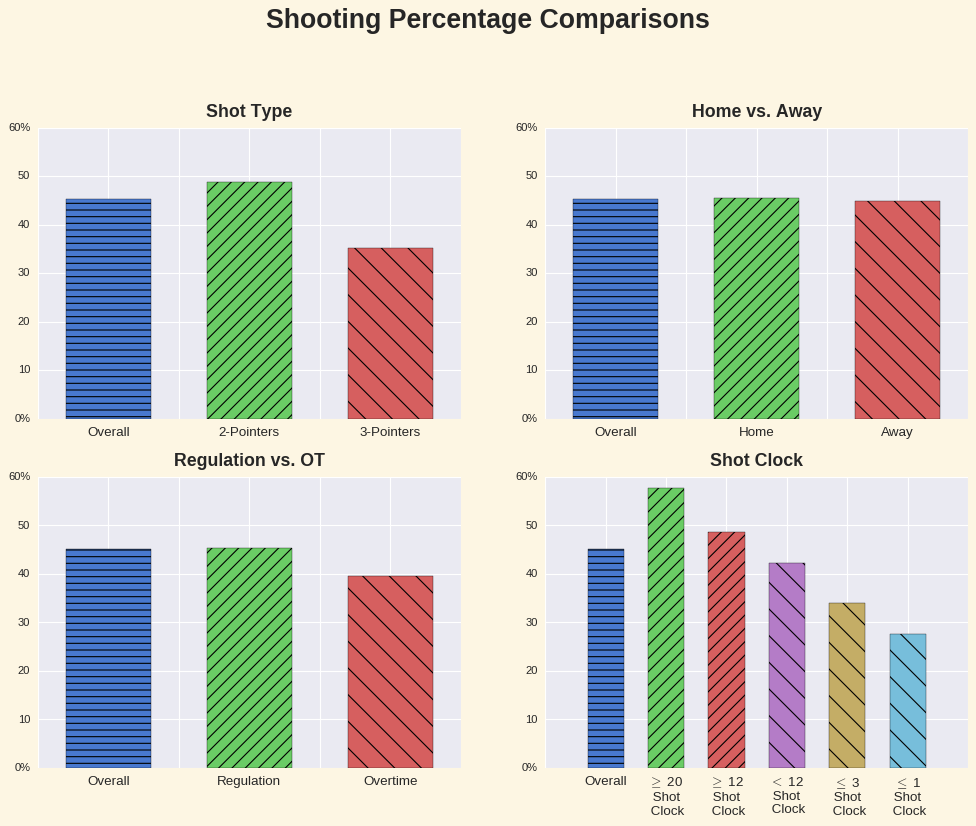

In [0]:
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns


# Set Style
plt.style.use('seaborn-muted')

# Create my figure and axes variables
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Set background color for the figure
fig.set_facecolor('#fdf6e3')

ax1, ax2, ax3, ax4 = ax.flatten()

fig.suptitle('Shooting Percentage Comparisons', y=1.05, fontsize=24, 
             fontweight='extra bold')


# --------------- Graph #1 -------------------

# define variables to use in AX1
ax1_height = [df['FGM'].mean(), twos_att['FGM'].mean(), 
              threes_att['FGM'].mean()]
ax1_bars = ('Overall', '2-pt', '3-pt')
patterns = ['--', '//', '\\']
y_labels = ['0%', 10, 20, 30, 40, 50, '60%']

# For loop to create my 3 bars for plot 1
for i in range(len(ax1_bars)):
  ax1.bar(i, ax1_height[i], hatch=patterns[i], width=.6)

# Set title
ax1.set_title('Shot Type', x=.5, y=1.02, fontsize=16, 
              fontweight='bold')

# Axis Facecolor
ax1.set_facecolor('#eaeaf2')

# Set y limits
ax1.set_ylim(0, .6)

# Adjust tick labels
ax1.set_xticklabels(['', 'Overall', '', '2-Pointers', '', '3-Pointers', ''], 
                    size=12)

ax1.set_yticklabels(y_labels)


# --------------- Graph #2 -------------------

# define variables to use in AX2
ax2_height = [df['FGM'].mean(), df_home['FGM'].mean(), df_away['FGM'].mean()]
ax2_bars = ('Overall', 'Home', 'Away')
patterns = ['--', '//', '\\']
y_labels = ['0%', 10, 20, 30, 40, 50, '60%']

# For loop to create my bars for plot 2
for i in range(len(ax2_bars)):
  ax2.bar(i, ax2_height[i], hatch=patterns[i], width=.6)

# Set title
ax2.set_title('Home vs. Away', x=.5, y=1.02, fontsize=16, 
              fontweight='bold')

# Axis Facecolor
ax2.set_facecolor('#eaeaf2')

# Set y limits
ax2.set_ylim(0, .6)

# Adjust tick labels
ax2.set_xticklabels(['', 'Overall', '', 'Home', '', 'Away', ''], size=12)
ax2.set_yticklabels(y_labels)


# --------------- Graph #3 -------------------

# define variables to use in AX3
ax3_height = [df['FGM'].mean(), df_regulation['FGM'].mean(), 
              df_OT['FGM'].mean()]
ax3_bars = ('Overall', 'Regulation', 'Overtime')
patterns = ['--', '//', '\\']
y_labels = ['0%', 10, 20, 30, 40, 50, '60%']

# foor loop to create bars for plot 3
for i in range(len(ax3_bars)):
  ax3.bar(i, ax3_height[i], hatch=patterns[i], width=.6)

# Set title
ax3.set_title('Regulation vs. OT', x=.5, y=1.02, fontsize=16, 
              fontweight='bold')

# Axis Facecolor
ax3.set_facecolor('#eaeaf2')

# Set y limits
ax3.set_ylim(0, .6)

# Adjust tick labels
ax3.set_xticklabels(['', 'Overall', '', 'Regulation', '', 'Overtime', ''], 
                    size=12)

ax3.set_yticklabels(y_labels)


# --------------- Graph #4 -------------------

# define variables to use in AX4
ax4_height = [df['FGM'].mean(), df_first4['FGM'].mean(), 
              df_first12['FGM'].mean(), df_last12['FGM'].mean(), 
              last_3_seconds_subset['FGM'].mean(), 
              last_second_shot_subset['FGM'].mean()]
ax4_bars = ('Overall', 'First 4 seconds', 'Early Possession', 
            'Late Possession', 'Last 3 seconds', 'Last 1 second')
patterns = ['--', '//', '//', '\\', '\\', '\\']
y_labels = ['0%', 10, 20, 30, 40, 50, '60%']

# for loop to create bars in plot 4
for i in range(len(ax4_bars)):
  ax4.bar(i, ax4_height[i], hatch=patterns[i], width=.6)

# Set title
ax4.set_title('Shot Clock', x=.5, y=1.02, fontsize=16, 
              fontweight='bold')

# Axis Facecolor
ax4.set_facecolor('#eaeaf2')

# Set y limits
ax4.set_ylim(0, .6)

# Set ticks on x axis
ax4.xaxis.set_major_locator(ticker.MaxNLocator(7))

# Adjust tick labels
ax4.set_xticklabels(['', 'Overall', '$\geq$ 20 \n Shot \n Clock', 
                     '$\geq$ 12 \n Shot \n Clock', '$<$ 12 \n Shot \n Clock', 
                     '$\leq$ 3 \n Shot \n Clock', '$\leq$ 1 \n Shot \n Clock'], 
                    size=12)

ax4.set_yticklabels(y_labels)

# -----------------------------------------------------------------

# Show the graph, squelch the return output
plt.show()

In [0]:
months = []
for month in df['MATCHUP']:
  months.append(month[:3])
set(months)

{'DEC', 'FEB', 'JAN', 'MAR', 'NOV', 'OCT'}

In [0]:
# create new column on the dataframe with the month that each shot was taken

df['MONTH'] = months

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,MONTH
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,MAR
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,MAR
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,MAR
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,MAR
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,MAR


In [0]:
# Create subsets of data where shots are separated by month

october_shots = df[df['MONTH'] == 'OCT']
november_shots = df[df['MONTH'] == 'NOV']
december_shots = df[df['MONTH'] == 'DEC']
january_shots = df[df['MONTH'] == 'JAN']
february_shots = df[df['MONTH'] == 'FEB']
march_shots = df[df['MONTH'] == 'MAR']

print(october_shots.shape)
print(november_shots.shape)
print(december_shots.shape)
print(january_shots.shape)
print(february_shots.shape)
print(march_shots.shape)

(3533, 22)
(30700, 22)
(34502, 22)
(33262, 22)
(21716, 22)
(4356, 22)


In [0]:
print(f"October FG%:", october_shots['FGM'].mean())
print(f"November FG%:",november_shots['FGM'].mean())
print(f"December FG%:",december_shots['FGM'].mean())
print(f"January FG%:",january_shots['FGM'].mean())
print(f"February FG%:",february_shots['FGM'].mean())
print(f"March FG%:",march_shots['FGM'].mean())

October FG%: 0.4548542315312765
November FG%: 0.45615635179153097
December FG%: 0.4563503565010724
January FG%: 0.4491612049786543
February FG%: 0.4457542825566403
March FG%: 0.4428374655647383


In [0]:
# Overall FG% of the dataset

df['FGM'].mean()

0.4521390812764994

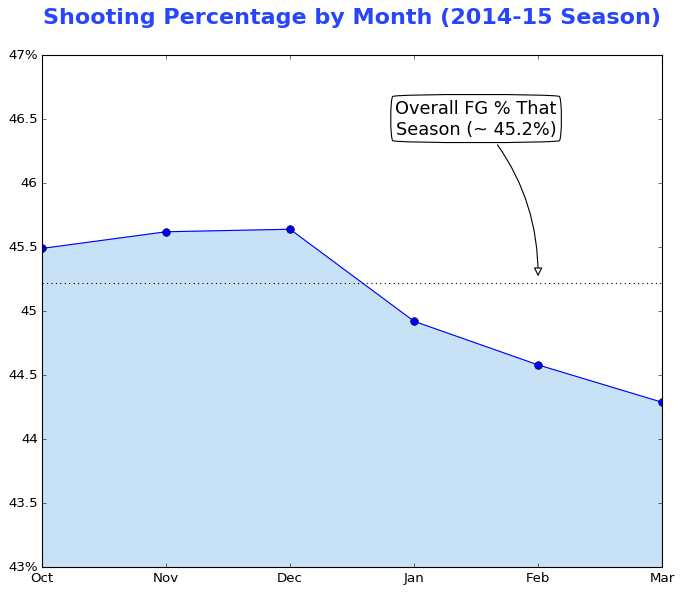

In [0]:
import matplotlib.pyplot as plt

# Set graph style

plt.style.use('classic')

# Assign x-axis and y-axis data to variables
x = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
y = [october_shots['FGM'].mean(), november_shots['FGM'].mean(), 
         december_shots['FGM'].mean(), january_shots['FGM'].mean(),
         february_shots['FGM'].mean(), march_shots['FGM'].mean()]

# Create figure and axes variables
fig5, ax = plt.subplots(figsize=(10,8))

# Set figure background color
fig5.set_facecolor('#ffffff')

# Plot the line graph
ax.plot(x, y, marker='o', markersize=7)

# Y-axis limits
plt.ylim(.43, .47)

# Set Title
ax.set_title('Shooting Percentage by Month (2014-15 Season)',
             x=.5, y=1.05, fontsize=20, fontweight='heavy', color='#0024fd',
             alpha=.85)

# Y-ticks
ax.set_yticklabels(['43%', '43.5', '44','44.5', '45', '45.5','46', '46.5',
                    '47%'])

# Tick Parameters
ax.tick_params(axis='both', which='major', labelsize=12, color='black')

# Asthetics

# Fill in area underneath the graph
plt.fill_between(x, y, color="#73b7eb", alpha=0.4)

# # Plot and Annotate the overall FG % from the 2014-15 season
ax.axhline(y=df['FGM'].mean(), linestyle=':', color='black')
# ax.annotate('Overall FG % That\nSeason (~ 45.2%)', ('Feb', .452), 
#             textcoords='axes fraction', xytext=(0.8, 0.8),
#             arrowprops=dict(facecolor='black', shrink=0.1), fontsize=14,
#             horizontalalignment='center', verticalalignment='top')

ax.annotate("Overall FG % That\nSeason (~ 45.2%)",
                  xy=(4, .4525), xytext=(3.5, 0.465),
                  size=16, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"))

# Show the graph, squelch the return output
plt.show()

### Just for Fun

Combine 2 pointers, home shots, regulation shots, first half possession shots, and December shots and then see the FG %

In [0]:
df_highest = df[(df['PTS_TYPE'] == 2) & (df['LOCATION'] == 'H') & 
                (df['PERIOD'] <= 4) & (df_test['SHOT_CLOCK'] >= 12.0) & 
                (df['MONTH'] == 'DEC')]

print(df_highest.shape)
df_highest.head()

(6460, 22)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,MONTH
185,21400459,"DEC 29, 2014 - CHA vs. MIL",H,L,-10,1,2,11:37,16.9,8,6.9,19.2,2,made,"Marshall, Kendall",203088,2.7,1,2,brian roberts,203148,DEC
194,21400444,"DEC 27, 2014 - CHA vs. ORL",H,L,-8,3,2,8:14,14.6,11,9.2,19.7,2,missed,"Payton, Elfrid",203901,4.5,0,0,brian roberts,203148,DEC
209,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,1,2,11:23,13.5,12,8.5,21.3,2,made,"Faried, Kenneth",202702,4.6,1,2,brian roberts,203148,DEC
210,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,2,2,10:57,16.3,7,6.5,10.5,2,missed,"Robinson, Nate",101126,1.6,0,0,brian roberts,203148,DEC
211,21400409,"DEC 22, 2014 - CHA vs. DEN",H,W,28,3,2,8:07,12.0,0,11.2,13.8,2,missed,"Robinson, Nate",101126,4.0,0,0,brian roberts,203148,DEC


In [0]:
print(f"The resulting FG % is", round(df_highest['FGM'].mean()*100, 2), f"%")

The resulting FG % is 53.37 %
